# Primera entrega Proyecto Final - Predicción casos UCI COVID


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Introducción**

La enfermedad por COVID-19 ha sido la pandemia más reportada en los últimos años. Utilizando un dataset del Departamento de Epidemiología del Ministerio de Salud de Chile, con todos los registros de casos confirmados por COVID-19 en la población notificada entre Octubre del 2021 y Marzo del 2023, se realizaron agrupaciones de datos para comparar frecuencias, incidencias y evolución, teniendo en cuenta edades y estado de vacunación.
En general, aquellos con el esquema de vacunación completo suelen tener una incidencia cruda de contagio más baja en comparación con aquellos sin el esquema completo, particularmente en las categorías de edad más altas.
Lo notorio es que el aumento de los casos de contagio incide positivamente en el aumento de los casos de hospitalización, agravamiento y muerte. Un punto de inflexión es la ocupación de camas UCI que determina los aumentos del uso de recursos materiales y humanos sanitarios, aumentos de las restricciones sociales, adelanto de vacaciones e iclusive periodos de cuarentena. En relación a esto último es de interés determinar si es posible predecir dicho aumento y así estar preparados para enfrentar mejor el problema.

**Motivación y audiencia**

El manejo de una pandemia sin lugar a dudas significa un gran desafío para la Salud Pública a nivel global y local. Las decisiones que se tomen en relacion a ella tienen un impacto en la forma, momento y cuantía de recursos que se manejan. En ese esenario los organismos encargados de la gestion de dichos recursos se beneficiarían al contar con herramientas de apoyo a la toma de estas decisiones.

**Problema a resolver**

Predecir el aumento del número de casos UCI y así enfrentar mejor el escenario sanitario.

**Contexto analítico**

Se cuenta con un dataset de tipo CSV procedente del Departamento de Epidemiología del MINSAL Chile, que contiene datos de cantidad de casos confirmados para COVID-19, casos de hospitalizacion, casos de hospitalización en UCI, casos de defunciones, sus incidencias crudas y ponderadas, por semana epidemiológica, por cada estado de vacunación.

Se efectuarán las siguientes tareas con los datos:
Leer, transformar y preparar datos para su visualización
Realizar análisis y construir visualizaciones para identificar patrones


**Pregunta**: ¿Cuánto influye el aumento de casos confirmados en el aumento de los casos UCI?

*   Hipotesis Alternativa: Influye positivamente, es decir a mayor número de casos de contagios, más aumentan los casos de pacientes UCI
*   Hipótesis Nula: No existe relación entre el aumento de los casos confirmados de COVID, con los casos de hospitalizaciones y de.

**Problema Comercial**

Manipular los datos disponibles y hacer visualizaciones para responder a **preguntas** cómo:

¿Cómo aumenta el número de casos de pacientes que llegan a ser hospitalizados a medida que aumenta el número de casos resgitrados como positivos?

¿Cómo aumenta el número de casos de pacientes graves hospitalizados (UCI) a medida que aumenta el número de casos resgitrados como positivos?

¿En qué meses del año se dan más estas alzas de casos?

¿En qué grupo etario es mayor el riesgo de contagio y/o hospitalización?

¿En que tipo de estado de vacunación (vacunados o sin vacuna), se da la mayor alza de casos?

#Exploración de los datos

In [ ]:
url= "https://github.com/MinCiencia/Datos-COVID19/raw/master/output/producto89/incidencia_en_vacunados_edad.csv"
df= pd.read_csv(url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929 entries, 0 to 5928
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   semana_epidemiologica             5929 non-null   object 
 1   edad                              5929 non-null   object 
 2   estado_vacunacion                 5929 non-null   object 
 3   casos_confirmados                 5929 non-null   int64  
 4   casos_hospi                       5929 non-null   int64  
 5   casos_uci                         5929 non-null   int64  
 6   casos_def                         5929 non-null   int64  
 7   poblacion                         5929 non-null   int64  
 8   incidencia_cruda_confirmados      5929 non-null   float64
 9   incidencia_cruda_hospi            5929 non-null   float64
 10  incidencia_cruda_uci              5929 non-null   float64
 11  incidencia_cruda_def              5929 non-null   float64
 12  incide

Se observan datos de tipo objeto, entero y flotante. El dataset tiene datos tipo objeto para las fechas, pero no en formato datatime, por lo que se procederá a cambiarlos.

In [ ]:
df["semana_epi_time"] = pd.to_datetime(df["semana_epidemiologica"] + "-1", format='%Y-%W-%w', errors='coerce')
df_edadtot= df[df["edad"]=="Total"].copy()
df_edad_sin_tot= df[df["edad"]!="Total"].copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929 entries, 0 to 5928
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   semana_epidemiologica             5929 non-null   object        
 1   edad                              5929 non-null   object        
 2   estado_vacunacion                 5929 non-null   object        
 3   casos_confirmados                 5929 non-null   int64         
 4   casos_hospi                       5929 non-null   int64         
 5   casos_uci                         5929 non-null   int64         
 6   casos_def                         5929 non-null   int64         
 7   poblacion                         5929 non-null   int64         
 8   incidencia_cruda_confirmados      5929 non-null   float64       
 9   incidencia_cruda_hospi            5929 non-null   float64       
 10  incidencia_cruda_uci              5929 non-null 

In [ ]:
casos_conf_serie= df_edadtot.groupby(by="semana_epi_time")["casos_confirmados"].sum()
casos_uci_serie= df_edadtot.groupby(by="semana_epi_time")["casos_uci"].sum()
casos_hospi_serie= df_edadtot.groupby(by="semana_epi_time")["casos_hospi"].sum()

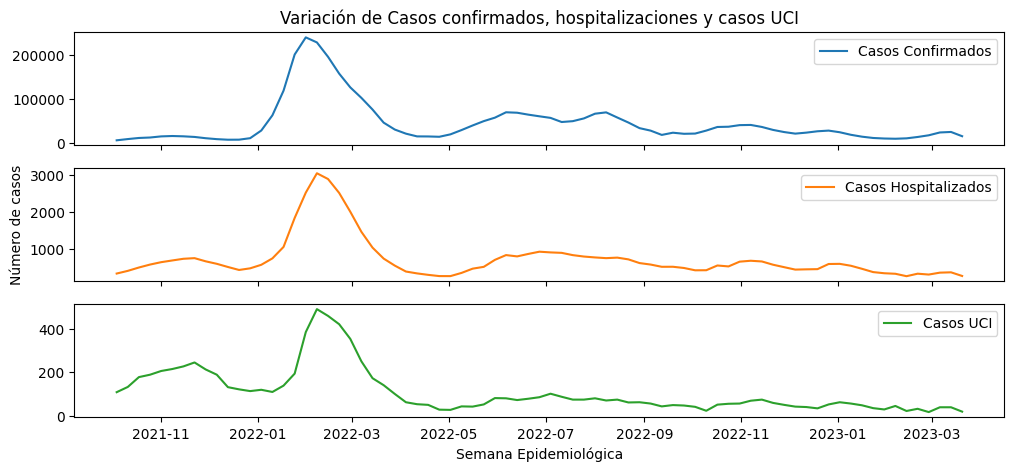

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=False)
ax[0].plot(casos_conf_serie.index, casos_conf_serie.values, label='Casos Confirmados')
ax[1].plot(casos_hospi_serie.index, casos_hospi_serie.values, label='Casos Hospitalizados', color='C1')
ax[2].plot(casos_uci_serie.index, casos_uci_serie.values, label='Casos UCI', color='C2')
ax[0].set_title('Variación de Casos confirmados, hospitalizaciones y casos UCI')
ax[1].set_ylabel('Número de casos')
ax[2].set_xlabel('Semana Epidemiológica')


ax[0].legend()
ax[1].legend()
ax[2].legend()

En este gráfico podemos ver cómo en un mismo periodo de tiempo de poco más de un año, hubo un peak de casos confirmados de COVID-19, seguido de un aumento en los casos de hospitalización y los casos de UCI. Si bien las magnitudes son distintas(eje Y), las proporciones son similares, y nos brindan una vista de cómo se desarrolla la enfermedad. Podemos inferir que a mayor número de casos, mayores también son las hospitalizaciones y los agravamientos. Y eso también se muestra a lo largo de las pequeñas variaciones.

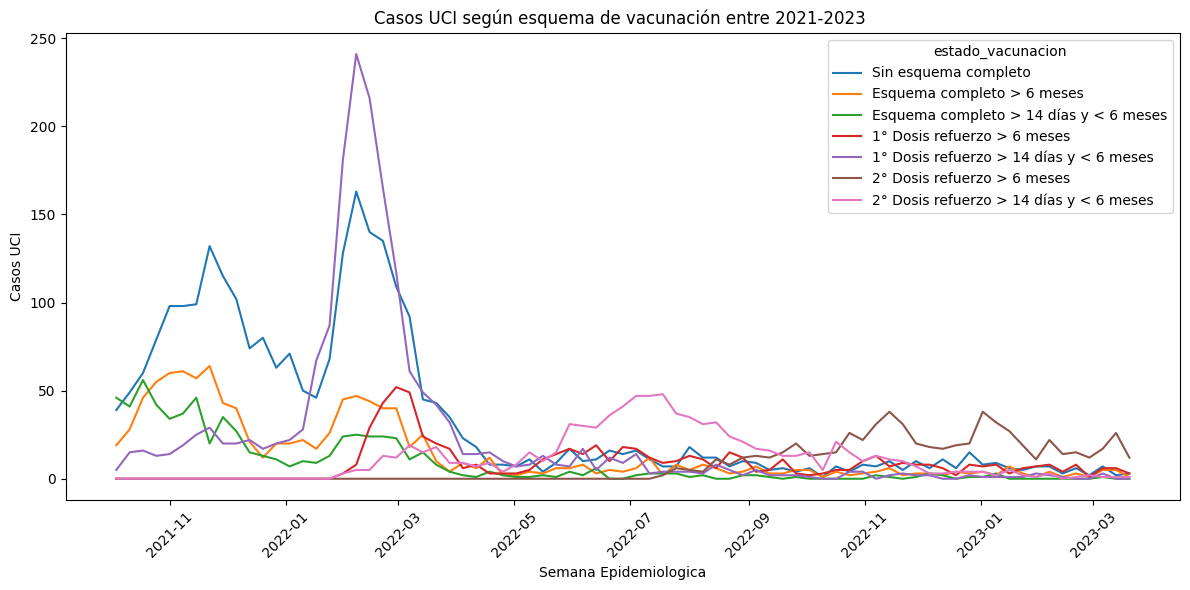

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("Casos UCI según esquema de vacunación entre 2021-2023 ")
ax.set_ylabel("Casos UCI")
ax.set_xlabel("Semana Epidemiologica")

sns.lineplot(data=df_edadtot, x='semana_epi_time', y='casos_uci', hue='estado_vacunacion')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

En relación al estado de vacunación a lo largo del tiempo en los casos UCI, en este gráfico, podemos visualizar que si bien en un inicio la mayor cantidad de casos ocurre en personas sin esquema completo, con el transcurso de la vacunación, las alzas son menores y los pequeños peaks son de personas con un esquema más avanzado de vacunación.

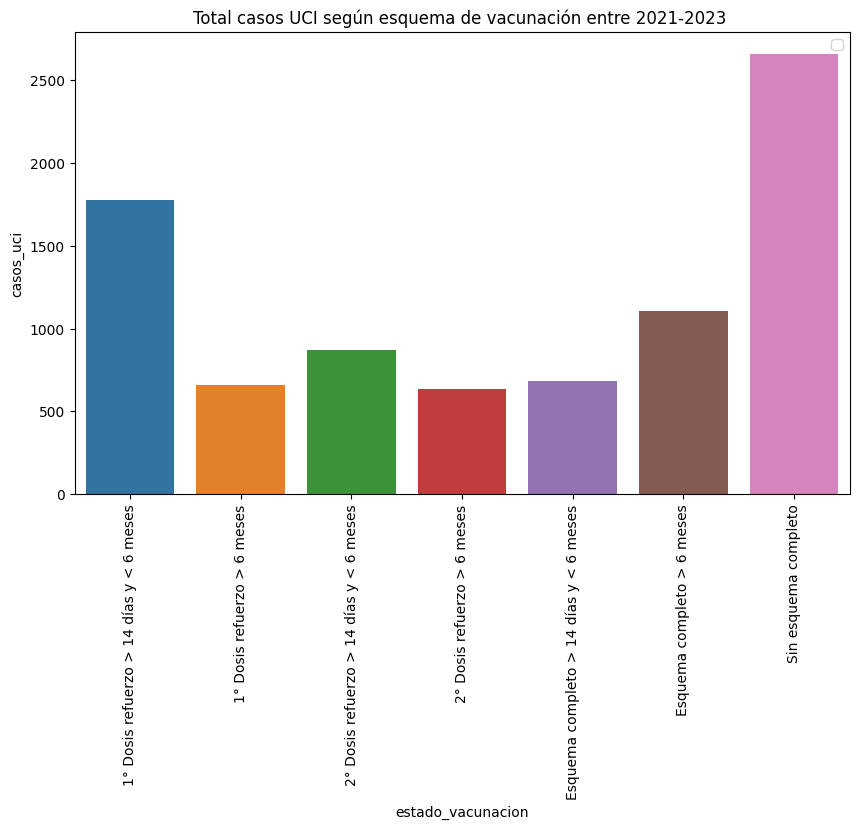

In [ ]:
casos_uci_vac= df_edad_sin_tot.groupby(by="estado_vacunacion", as_index= False)["casos_uci"].sum()
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Total casos UCI según esquema de vacunación entre 2021-2023 ")
ax.set_ylabel("Número de casos UCI")
ax.set_xlabel("Estado de vacunación")

sns.barplot(data=casos_uci_vac, x='estado_vacunacion', y= 'casos_uci')
plt.xticks(rotation=90)
ax.legend()

Este gráfico nos confirma que la mayor proporción de casos UCI ocurre en el grupo que no tiene el esquema de vacunación completo.

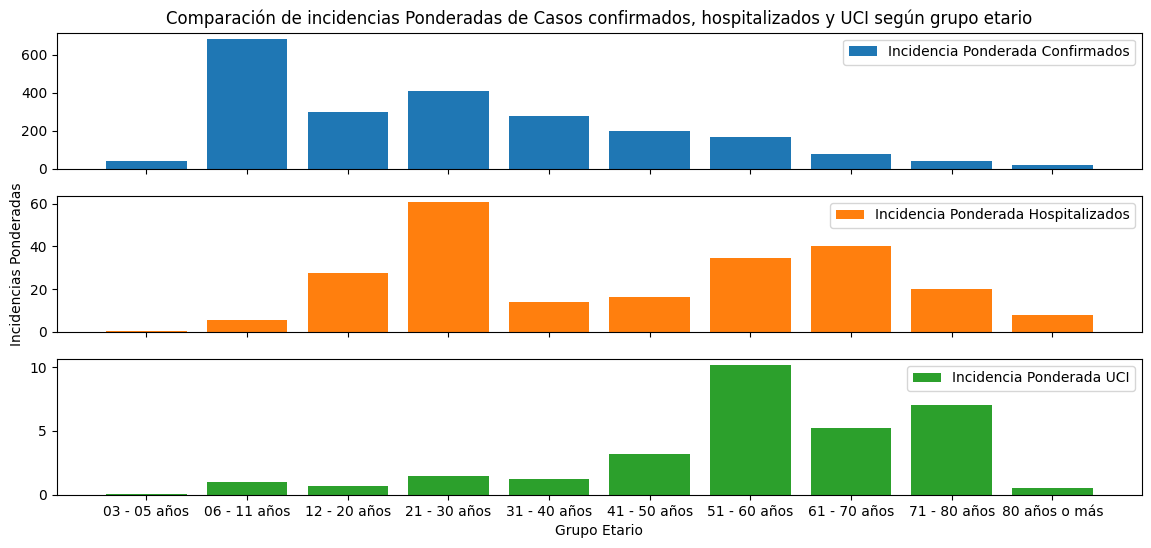

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(14, 6), sharex=True, sharey=False)
ax[0].bar(df_edad_sin_tot["edad"], df_edad_sin_tot["incidencia_ponderada_confirmados"], label='Incidencia Ponderada Confirmados')
ax[1].bar(df_edad_sin_tot["edad"], df_edad_sin_tot["incidencia_ponderada_hospi"], label='Incidencia Ponderada Hospitalizados', color='C1')
ax[2].bar(df_edad_sin_tot["edad"], df_edad_sin_tot["incidencia_ponderada_uci"], label='Incidencia Ponderada UCI', color='C2')
ax[0].set_title('Comparación de incidencias Ponderadas de Casos confirmados, hospitalizados y UCI según grupo etario')
ax[1].set_ylabel('Incidencias Ponderadas')
ax[2].set_xlabel('Grupo Etario')


ax[0].legend()
ax[1].legend()
ax[2].legend()

En este set de gráficos podemos observar que el grupo etario que más incidencia de contagio tuvo, es el de niños de 6-11 años; el más incidencia de hospitalización, es el de 61-70 años y el de más incidencia de hospitalización UCI tuvo fue el de 51-60 seguido por el de 71-80 años. Por lo tanto, el grupo más avanzado de edad es el que se agrava más.

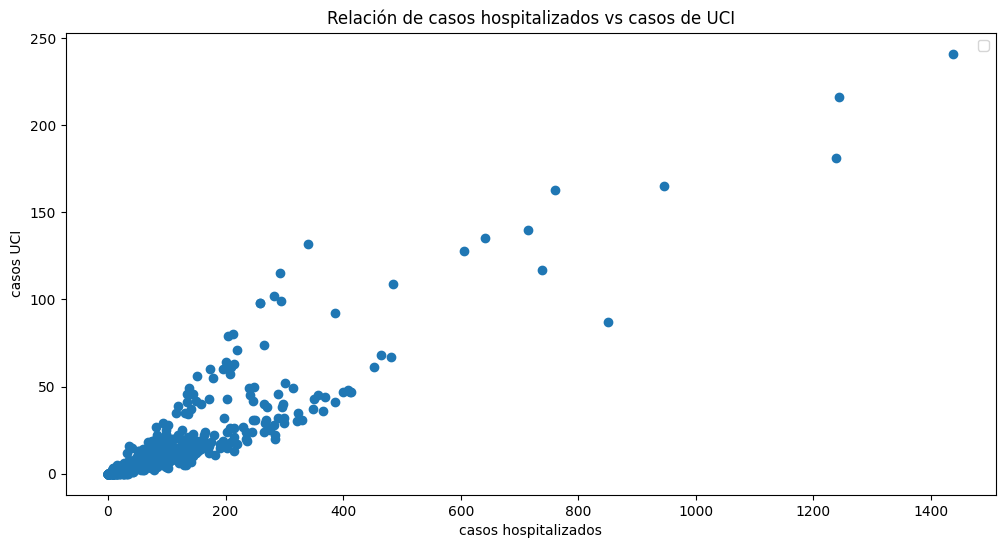

In [ ]:
fig, ax = plt.subplots(figsize= (12,6))
ax.scatter(df_edadtot["casos_hospi"], df_edadtot["casos_uci"])

ax.set_title("Relación de casos hospitalizados vs casos de UCI")
ax.set_ylabel("casos UCI")
ax.set_xlabel("casos hospitalizados")

plt.legend()

Con este gráfico se puede inferir que existe una correlación positiva entre el aumento de la hospitalización y el aumento en los casos UCI.

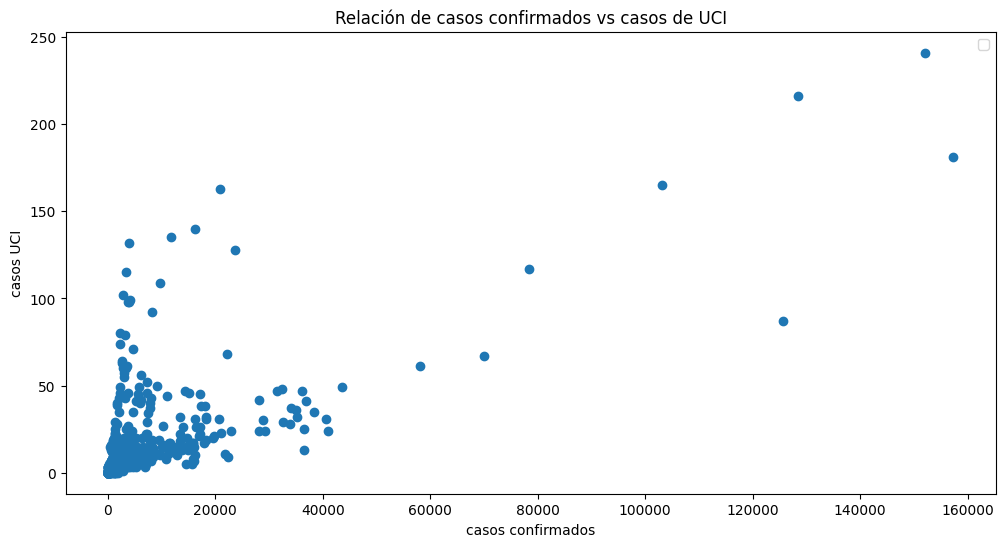

In [ ]:
fig, ax = plt.subplots(figsize= (12,6))
ax.scatter(df_edadtot["casos_confirmados"], df_edadtot["casos_uci"])

ax.set_title("Relación de casos confirmados vs casos de UCI")
ax.set_ylabel("casos UCI")
ax.set_xlabel("casos confirmados")

plt.legend();

Con este gráfico se puede inferir que existe una correlación positiva entre el aumento de la hospitalización y el aumento en los casos UCI.

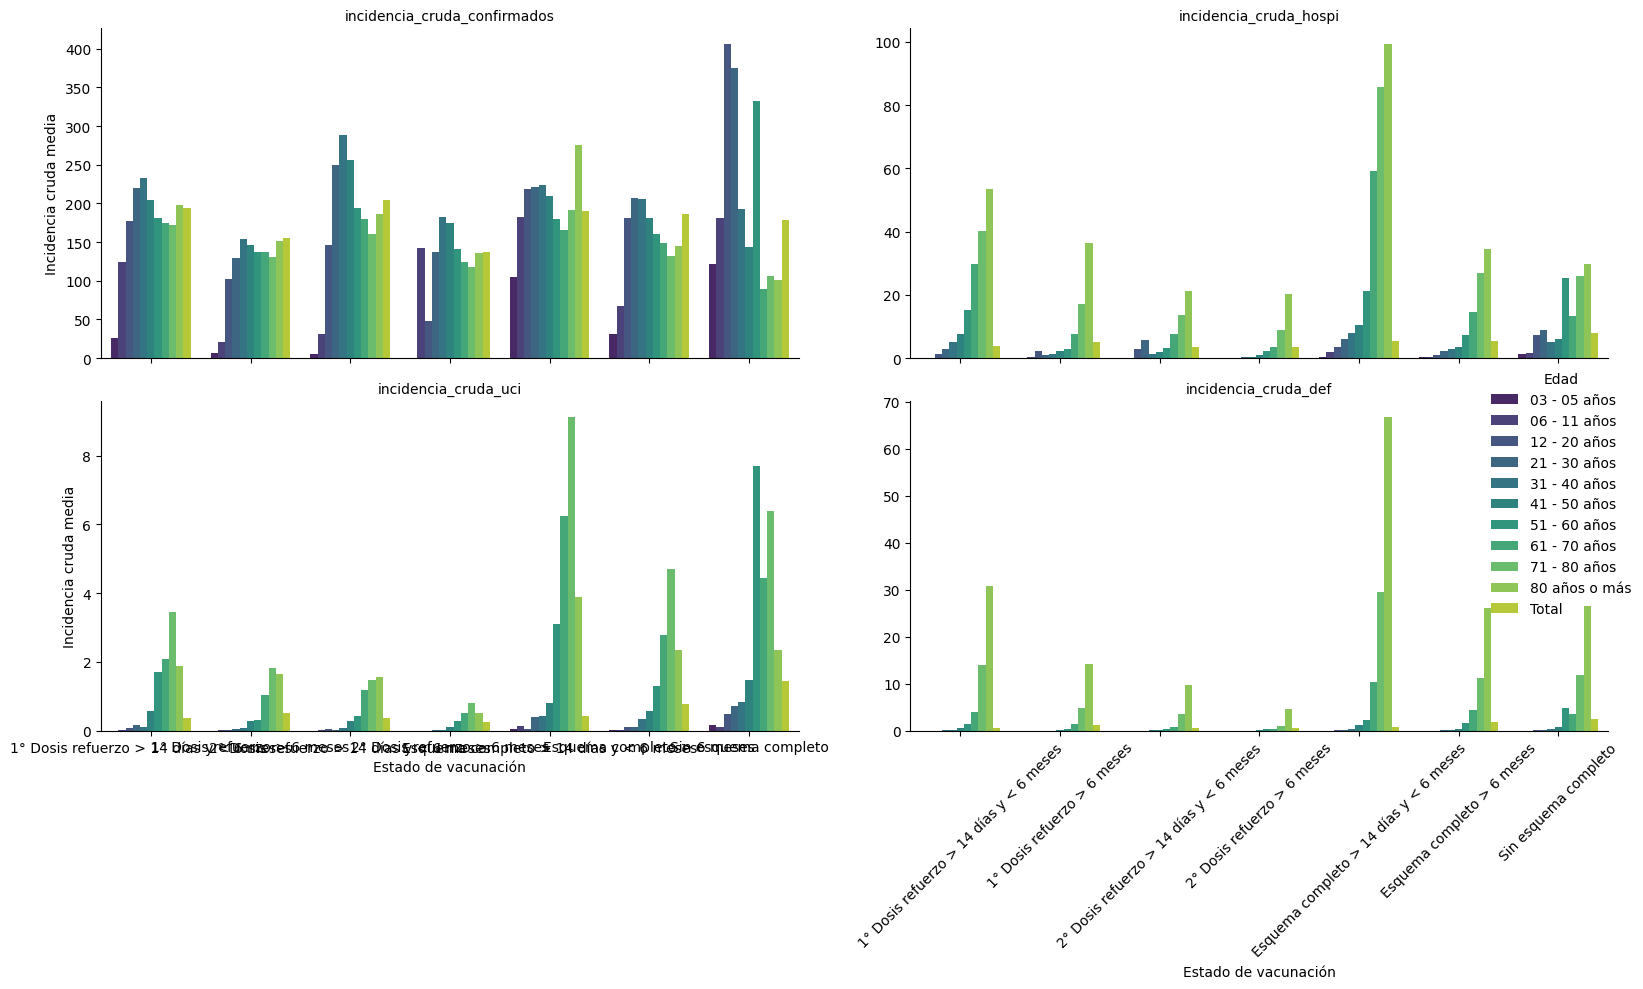

In [ ]:
grouped_data_age = df.groupby(['estado_vacunacion', 'edad'])[['incidencia_cruda_confirmados', 'incidencia_cruda_hospi', 'incidencia_cruda_uci', 'incidencia_cruda_def']].mean().reset_index()

melted_data_age = pd.melt(grouped_data_age, id_vars=['estado_vacunacion', 'edad'], var_name='outcome', value_name='mean_crude_incidence')

g = sns.FacetGrid(melted_data_age, col="outcome", col_wrap=2, height=5, aspect=1.5, sharey=False)
g.map_dataframe(sns.barplot, x="estado_vacunacion", y="mean_crude_incidence", hue="edad", palette="viridis")

g.set_axis_labels("Estado de vacunación", "Incidencia cruda media")
g.set_titles(col_template="{col_name}")
g.add_legend(title="Edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Y en este último set de gráficos podemos ver las medias de las 4 incidencias donde, cada color representa una categoría de edad diferente, y las barras están agrupadas por estado de vacunación.
Destacando en el grupo UCI, con incidencias más altas en las categorías de mayor edad y con una vacunación ya iniciada.


##Conclusiones

Se concluye que existe un mayor riesgo de hospitalización y casos UCI a medida que aumentan significativamente los casos confirmados independiente del estado de vacunación ya que en todos los grupos se producen alzas.
En general, aquellos con el esquema de vacunación completo suelen tener una incidencia más baja en comparación con aquellos sin el esquema completo, particularmente en las categorías de edad más altas.
Esto sugiere que la vacunación puede estar asociada con un menor riesgo de enfermedad, gravedad y/o muerte, y que este efecto puede ser más pronunciado en las categorías de edad más altas pero se requiere un análisis más profundo para determinar específicamente grupos de riesgo.

##Recomendaciones

Para contar con un mejor plan de acción ante alzas de contagios y un mayor riesgo de ocupación total en las camas UCI, déficit de recursos a este nivel y falta de respuesta, es recomendable poder predecir el aumento de casos UCI cuantitativamente. Esto para aumentar los recursos humanos, materiales, tecnológicos y sanitarios asociados. En este punto un modelo de ML que prediga alzas en los casos UCI con un par de semanas de anticipación podria ser útil para poder abordar el problema con mejor preparación.

##Posible resolución con un modelo de machine learning


Primero se separó el dataset original en dos, uno va a corresponder al DataFrame de las persona que no tienen esquema de vacunación completo y se llamará "No Vacunados" y el de las cuentan con el esquema completo en distintas etapas de refuerzo, como "Vacunados". El objetivo es crear un modelo de regresión para cada DataFrame y así poder predecir cual va a ser el aumento o disminución de casos UCI deacuerdo a una entrada en cada caso. Además de recodificará la columna datatime para dejarla con formato numérico.

In [ ]:
df['epi_time']=df['semana_epi_time'].dt.strftime("%Y%m%d").astype(int)
reemplazos= {'Sin esquema completo': 'No vacunados', 'Esquema completo > 14 días y < 6 meses': 'Vacunados', 'Esquema completo > 6 meses': 'Vacunados', '1° Dosis refuerzo > 14 días y < 6 meses': 'Vacunados', '1° Dosis refuerzo > 6 meses': 'Vacunados', '2° Dosis refuerzo > 14 días y < 6 meses': 'Vacunados', '2° Dosis refuerzo > 6 meses': 'Vacunados'}
df["Vacunacion"]= df['estado_vacunacion'].replace(reemplazos)
df_edadtot= df[df["edad"]=="Total"].copy()
df_agrupado= df.groupby(['epi_time', 'Vacunacion'], as_index= False).sum()
df_agrupado.head()

<ipython-input-27-e9a609f48ab9>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agrupado= df.groupby(['epi_time', 'Vacunacion'], as_index= False).sum()


,epi_time,Vacunacion,casos_confirmados,casos_hospi,casos_uci,casos_def,poblacion,incidencia_cruda_confirmados,incidencia_cruda_hospi,incidencia_cruda_uci,incidencia_cruda_def,incidencia_ponderada_confirmados,incidencia_ponderada_hospi,incidencia_ponderada_uci,incidencia_ponderada_def
0,20211004,No vacunados,3276,240,78,50,10039596,409.842109,62.756511,19.476922,17.818134,86.646273,8.923545,2.842777,1.688330
1,20211004,Vacunados,9794,450,140,48,28195496,737.538624,86.082557,19.034589,12.734528,134.616199,7.088917,2.204741,0.870478
2,20211011,No vacunados,4400,276,98,36,9906524,550.283255,68.042284,25.260632,14.405680,119.645057,10.015024,3.904522,0.780010
3,20211011,Vacunados,14314,558,168,60,28328566,1117.971797,102.832021,23.433377,30.113676,213.586387,9.155148,2.475883,1.444665
4,20211018,No vacunados,5768,348,120,54,9805036,764.871993,96.586399,32.803475,23.188059,164.476349,12.614602,4.810397,1.845394


In [ ]:
df_vacunados= df_agrupado[df_agrupado['Vacunacion']=='Vacunados']
df_vacunados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1 to 153
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   epi_time                          77 non-null     int64  
 1   Vacunacion                        77 non-null     object 
 2   casos_confirmados                 77 non-null     int64  
 3   casos_hospi                       77 non-null     int64  
 4   casos_uci                         77 non-null     int64  
 5   casos_def                         77 non-null     int64  
 6   poblacion                         77 non-null     int64  
 7   incidencia_cruda_confirmados      77 non-null     float64
 8   incidencia_cruda_hospi            77 non-null     float64
 9   incidencia_cruda_uci              77 non-null     float64
 10  incidencia_cruda_def              77 non-null     float64
 11  incidencia_ponderada_confirmados  77 non-null     float64
 12  incidenci

In [ ]:
df_no_vacunados= df_agrupado[df_agrupado['Vacunacion']=='No vacunados']
df_no_vacunados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 152
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   epi_time                          77 non-null     int64  
 1   Vacunacion                        77 non-null     object 
 2   casos_confirmados                 77 non-null     int64  
 3   casos_hospi                       77 non-null     int64  
 4   casos_uci                         77 non-null     int64  
 5   casos_def                         77 non-null     int64  
 6   poblacion                         77 non-null     int64  
 7   incidencia_cruda_confirmados      77 non-null     float64
 8   incidencia_cruda_hospi            77 non-null     float64
 9   incidencia_cruda_uci              77 non-null     float64
 10  incidencia_cruda_def              77 non-null     float64
 11  incidencia_ponderada_confirmados  77 non-null     float64
 12  incidenci

#Feature selection

In [ ]:
X_vac= df_vacunados.drop(["Vacunacion", "casos_uci"],axis=1)
y_vac= df_vacunados["casos_uci"]
X_vac.head()

,epi_time,casos_confirmados,casos_hospi,casos_def,poblacion,incidencia_cruda_confirmados,incidencia_cruda_hospi,incidencia_cruda_uci,incidencia_cruda_def,incidencia_ponderada_confirmados,incidencia_ponderada_hospi,incidencia_ponderada_uci,incidencia_ponderada_def
1,20211004,9794,450,48,28195496,737.538624,86.082557,19.034589,12.734528,134.616199,7.088917,2.204741,0.870478
3,20211011,14314,558,60,28328566,1117.971797,102.832021,23.433377,30.113676,213.586387,9.155148,2.475883,1.444665
5,20211018,17924,666,66,28430048,2316.791107,123.623981,44.312779,22.292207,481.461017,12.286867,4.984122,0.994627
7,20211025,19444,762,106,28770516,1654.215388,121.296390,31.052686,39.178874,314.645848,12.043824,3.588541,1.977896
9,20211101,23338,782,126,29306926,2017.783128,158.282854,39.672210,55.926789,392.453237,13.644565,3.988660,2.902210


In [ ]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features,dtype="float64")
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X_vac,y_vac)     #Forward seleccion para Vacunados

['casos_hospi', 'poblacion', 'casos_def', 'incidencia_cruda_confirmados']

In [ ]:
X_no_vac= df_no_vacunados.drop(["Vacunacion", "casos_uci"],axis=1)
y_no_vac= df_no_vacunados["casos_uci"]
forward_selection(X_no_vac,y_no_vac)     #Forward seleccion para No Vacunados

['incidencia_ponderada_uci',
 'poblacion',
 'incidencia_cruda_uci',
 'incidencia_cruda_def']

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=4,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(X_no_vac, y_no_vac)
sfs.k_feature_names_

('poblacion',
 'incidencia_cruda_uci',
 'incidencia_cruda_def',
 'incidencia_ponderada_uci')

#Elegir el algoritmo

In [ ]:
X_vac=X_vac[['casos_hospi', 'poblacion', 'casos_def', 'incidencia_cruda_confirmados']]
X_vac.head()

,casos_hospi,poblacion,casos_def,incidencia_cruda_confirmados
1,450,28195496,48,737.538624
3,558,28328566,60,1117.971797
5,666,28430048,66,2316.791107
7,762,28770516,106,1654.215388
9,782,29306926,126,2017.783128


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train_V,X_test_V,y_train_V,y_test_V = train_test_split(X_vac,y_vac,test_size=0.2,random_state=2)

lr_vac = LinearRegression()

lr_vac.fit(X_train_V,y_train_V)

y_pred_V = lr_vac.predict(X_test_V)

In [ ]:
X_no_vac=X_no_vac[['incidencia_ponderada_uci',
 'poblacion',
 'incidencia_cruda_uci',
 'incidencia_cruda_def']]
X_no_vac.head()

,incidencia_ponderada_uci,poblacion,incidencia_cruda_uci,incidencia_cruda_def
0,2.842777,10039596,19.476922,17.818134
2,3.904522,9906524,25.260632,14.405680
4,4.810397,9805036,32.803475,23.188059
6,6.337373,9464564,43.538306,31.637492
8,8.231339,8928140,53.498978,31.977384


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train_NV,X_test_NV,y_train_NV,y_test_NV = train_test_split(X_no_vac,y_no_vac,test_size=0.2,random_state=2)

lr_no_vac = LinearRegression()

lr_no_vac.fit(X_train_NV,y_train_NV)

y_pred_NV = lr_no_vac.predict(X_test_NV)

#Cálculo de métricas para validar el modelo

Métricas para el modelo de Vacunados

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
print("MAE",mean_absolute_error(y_test_V,y_pred_V))
print("RMSE",np.sqrt(mean_squared_error(y_test_V,y_pred_V)))
r2_V = r2_score(y_test_V,y_pred_V)
print("R2",r2_V)

MAE 12.860799607779178
RMSE 17.242250470047228
R2 0.9003613713865385


Métricas para el modelo de No vacunados

In [ ]:
print("MAE",mean_absolute_error(y_test_NV,y_pred_NV))
print("RMSE",np.sqrt(mean_squared_error(y_test_NV,y_pred_NV)))
r2_NV = r2_score(y_test_NV,y_pred_NV)
print("R2",r2_NV)

MAE 3.6020206746396273
RMSE 4.348013097300435
R2 0.9878792067435866


#Conclusiones

##Específicas del modelamiento

Con el primero modelo, Vacunados, se obtienen métricas de MAE y RMSE bajas, si bien no han sido comparadas con otros modelos, para un primer abordaje pueden ser satisfactorias. Ahora si a esto se suma que R2 es 0.9, muy cercano a 1, es posible decir que hay un buen ajuste de los datos.

Con el segundo modelo, No vacunados, ocurre que al buscar los mejores features utilizando más de un método, arroja siempre datos asociados a la categoría, esto porque para obtener o calcular la incidencia ya sea cruda o ponderada de UCI son necesarios los casos UCI o sea, la variable objetivo, entonces, no tiene sentido que la entrada necesite lo misma que la salida. De igual forma se realiza el modelo y las métricas son aún mejores, valores muy cercanos a cero con MAE y RMSE y 0.98 para R2, pero el súper ajuste está dado por la cercanía de los datos.

##Conclusión final
 Son necesarias columnas más heterogeneas para poder contar con un mayor o mejor número de columnas adecuadas para el modelo. Además por las carácteristicas del dataset que presenta resúmenes de datos, estos agrupamientos hacen que sea díficil definir la X e y, ya que las entradas son grupos de datos en sí. Es un set de datos óptimo para realizar estudios desciptivos pero díficil para trabajar un modelo predictivo.